<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Applying_Ridge_Regression_and_Lasso_for_Healthcare_Data_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

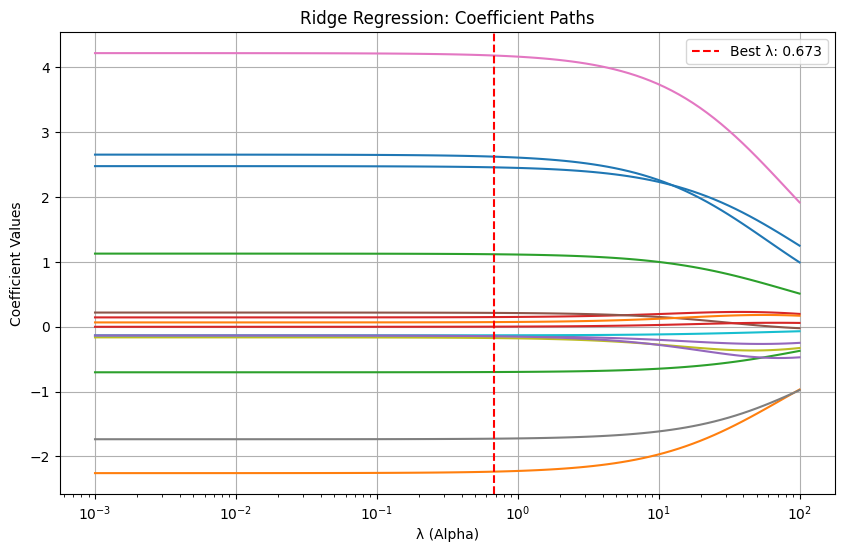

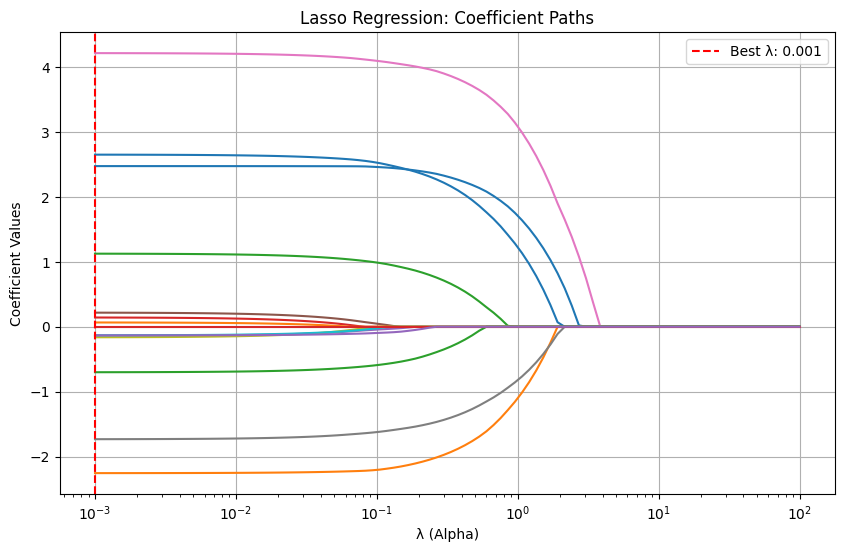

Best λ for Ridge: 0.673
Ridge Regression MSE: 0.7553
Best λ for Lasso: 0.001
Lasso Regression MSE: 0.7530
Number of Non-Zero Coefficients in Lasso: 14


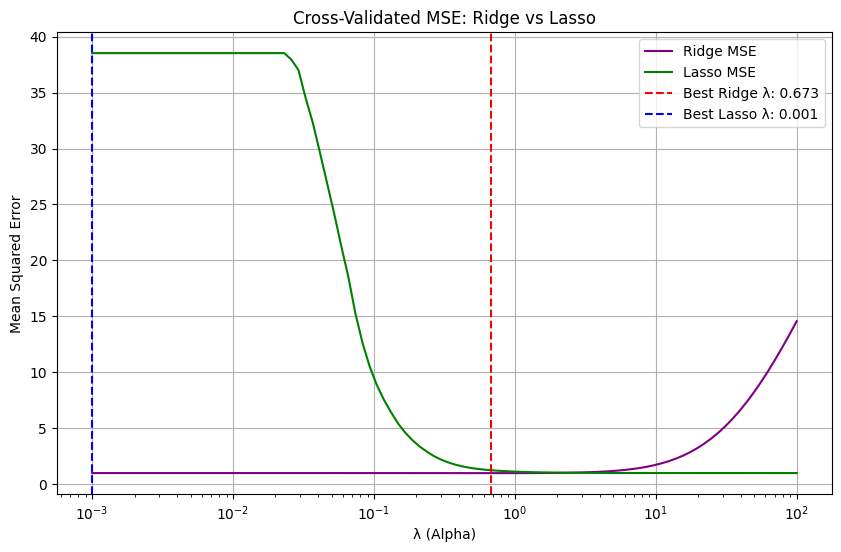

In [1]:
# Step 1: Importing Necessary Libraries
# I started by importing libraries for data handling, scaling, regression modeling, and visualization.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNetCV
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Step 2: Simulating Healthcare Data
# I generated synthetic healthcare data to simulate predictors (e.g., age, lab results) and an outcome (e.g., patient risk).
np.random.seed(123)
n_samples, n_features = 100, 15

# Predictors: Health-related variables (e.g., blood pressure, BMI, cholesterol)
X = np.random.normal(size=(n_samples, n_features))

# True coefficients: Sparse to simulate realistic scenarios
true_coefficients = np.array([3.0, -2.5, 1.2, 0, 0, 0, 4.5, -1.8, 0, 0, 2.3, 0, -0.7, 0, 0])

# Outcome variable (e.g., disease risk) with noise
Y = np.dot(X, true_coefficients) + np.random.normal(scale=1.0, size=n_samples)

# Step 3: Ridge Regression Implementation
# I implemented Ridge Regression using ElasticNet with l1_ratio=0, ensuring pure Ridge regularization.

alphas = np.logspace(-3, 2, 100)  # Range of λ (alpha) values
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)

# Standardizing the data to ensure coefficients are scaled evenly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting Ridge Regression and obtaining results
ridge_cv.fit(X_scaled, Y)
best_alpha_ridge = ridge_cv.best_params_['alpha']

# Extracting Coefficient Paths
coefs_ridge = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, Y)
    coefs_ridge.append(ridge.coef_)

# Step 4: Visualizing Ridge Coefficient Paths
# I plotted the Ridge coefficient paths as a function of λ (alpha).
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs_ridge)
plt.xscale('log')
plt.xlabel("λ (Alpha)")
plt.ylabel("Coefficient Values")
plt.title("Ridge Regression: Coefficient Paths")
plt.axvline(x=best_alpha_ridge, color='red', linestyle='--', label=f"Best λ: {best_alpha_ridge:.3f}")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Lasso Regression Implementation
# I implemented Lasso Regression by setting l1_ratio=1 in ElasticNetCV for feature selection.

lasso_cv = ElasticNetCV(l1_ratio=1.0, alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_scaled, Y)
best_alpha_lasso = lasso_cv.alpha_

# Extracting Coefficient Paths for Lasso
coefs_lasso = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, Y)
    coefs_lasso.append(lasso.coef_)

# Step 6: Visualizing Lasso Coefficient Paths
# I plotted the Lasso coefficient paths to observe feature selection behavior.
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs_lasso)
plt.xscale('log')
plt.xlabel("λ (Alpha)")
plt.ylabel("Coefficient Values")
plt.title("Lasso Regression: Coefficient Paths")
plt.axvline(x=best_alpha_lasso, color='red', linestyle='--', label=f"Best λ: {best_alpha_lasso:.3f}")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Cross-Validated MSE for Ridge and Lasso
# I compared the performance of Ridge and Lasso using their optimal λ values.

# Ridge Regression with Best α
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_scaled, Y)
ridge_mse = mean_squared_error(Y, ridge_best.predict(X_scaled))

# Lasso Regression with Best α
lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_best.fit(X_scaled, Y)
lasso_mse = mean_squared_error(Y, lasso_best.predict(X_scaled))

# Printing Final Results
print(f"Best λ for Ridge: {best_alpha_ridge:.3f}")
print(f"Ridge Regression MSE: {ridge_mse:.4f}")
print(f"Best λ for Lasso: {best_alpha_lasso:.3f}")
print(f"Lasso Regression MSE: {lasso_mse:.4f}")
print(f"Number of Non-Zero Coefficients in Lasso: {np.sum(lasso_best.coef_ != 0)}")

# Step 8: Visualizing Cross-Validated MSE for Ridge and Lasso
# I plotted the cross-validated MSE for both models across the range of λ values.
plt.figure(figsize=(10, 6))
plt.plot(alphas, -ridge_cv.cv_results_['mean_test_score'], label="Ridge MSE", color='purple')
plt.plot(alphas, lasso_cv.mse_path_.mean(axis=1), label="Lasso MSE", color='green')
plt.xscale('log')
plt.xlabel("λ (Alpha)")
plt.ylabel("Mean Squared Error")
plt.title("Cross-Validated MSE: Ridge vs Lasso")
plt.axvline(x=best_alpha_ridge, color='red', linestyle='--', label=f"Best Ridge λ: {best_alpha_ridge:.3f}")
plt.axvline(x=best_alpha_lasso, color='blue', linestyle='--', label=f"Best Lasso λ: {best_alpha_lasso:.3f}")
plt.legend()
plt.grid(True)
plt.show()
